In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats 
%matplotlib inline

In [420]:
file_path = 'C:/Users/hp/Desktop/Data Analytics/Assignments/Python/Basic Statistics - Hypothesis Testing_A6/'
loans= pd.read_csv( file_path + 'LoansData.csv')
price_quotes = pd.read_csv( file_path + 'Price_Quotes.csv')
priority_assessment = pd.read_csv( file_path + 'Priority_Assessment.csv')
treatment_facility = pd.read_csv( file_path + 'Treatment_Facility.csv')
films = pd.read_csv( file_path + 'Films.csv')

# BUSINESS PROBLEM-1
BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to
each other. The site makes anonymized data on loans and borrowers publicly available.
BUSINESS PROBLEM:
Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

In [36]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(),lc_iqr, uc_iqr,x.min(),
                       x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ],
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var','lc_iqr', 'uc_iqr','min', 'p1', 
                             'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [37]:
loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [38]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [57]:
loans['Interest.Rate'] = pd.to_numeric(loans['Interest.Rate'].str.replace('%', ''))

In [58]:
loans.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [59]:
# creating a copy of the data
loans_continuous = loans.select_dtypes('float64')
loans_categorical = loans.select_dtypes('object')

In [60]:
loans_continuous.apply(continuous_var_summary)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
dtype,float64,float64,float64,float64,float64,float64,float64
cardinality,380,710,275,632,29,2349,10
n_tot,2500,2500,2500,2500,2500,2500,2500
n,2499,2499,2498,2499,2497,2497,2497
nmiss,1,1,2,1,3,3,3
perc_miss,0.04,0.04,0.08,0.04,0.12,0.12,0.12
sum,31001250.0,29993933.09,32637.34,14216639.37,25152.0,38012292.0,2264.0
mean,12405.462185,12002.374186,13.065388,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,4.177201,3963.118185,4.507416,18281.015258,1.231149
var,60885773.795507,60012404.344627,17.449011,15706305.750123,20.316801,334195518.850116,1.515728


In [61]:
# Outlier treatment
loans_continuous = loans_continuous.apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

In [62]:
# Missing value treatment
loans_continuous = loans_continuous.apply( lambda x: x.fillna( x.mean() ) )
loans_categorical = loans_categorical.apply(lambda x:x.fillna(x.mode()[0]))

In [63]:
loans_continuous.apply(continuous_var_summary)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
dtype,float64,float64,float64,float64,float64,float64,float64
cardinality,376,692,266,603,22,2326,7
n_tot,2500,2500,2500,2500,2500,2500,2500
n,2500,2500,2500,2500,2500,2500,2500
nmiss,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,31022684.073629,30020529.731893,32650.858187,14021372.19888,25135.162195,36922960.552663,2218.662395
mean,12409.073629,12008.211893,13.060343,5608.54888,10.054065,14769.184221,0.887465
std,7796.219717,7736.635635,4.147574,3083.751452,4.377253,14758.263838,1.141347
var,60781041.868928,59855530.953807,17.202371,9509523.019376,19.160345,217806351.516406,1.302672


In [64]:
loans_categorical.describe().T

,count,unique,top,freq
Loan.Length,2500,2,36 months,1952
Loan.Purpose,2500,14,debt_consolidation,1307
Debt.To.Income.Ratio,2500,1669,0%,9
State,2500,46,CA,433
Home.Ownership,2500,5,MORTGAGE,1148
FICO.Range,2500,38,670-674,173
Employment.Length,2500,11,10+ years,730


In [65]:
loans_new = pd.concat([loans_categorical, loans_continuous], axis = 1 )

In [66]:
loans_new.shape

(2500, 14)

In [67]:
loans_new.rename( columns = {'Interest.Rate':'Interest_rate', 'Loan.Length':'Loan_len', 'Loan.Purpose':'Loan_purpose', 'Debt.To.Income.Ratio':'debt_to_income','Home.Ownership':'Home_ownership', 'FICO.Range':'FICO_range', 'Employment.Length':'Employment_len',
       'Amount.Requested':'Amt_req', 'Amount.Funded.By.Investors':'Amt_funded', 'Monthly.Income':'Monthly_income',
       'Open.CREDIT.Lines':'Open_creditlines', 'Revolving.CREDIT.Balance':'Revolving_credit_balance',
       'Inquiries.in.the.Last.6.Months':'Inq_last6_month'}, inplace = True )

In [68]:
loans_new

,Loan_len,Loan_purpose,debt_to_income,State,Home_ownership,FICO_range,Employment_len,Amt_req,Amt_funded,Interest_rate,Monthly_income,Open_creditlines,Revolving_credit_balance,Inq_last6_month
0,36 months,debt_consolidation,14.90%,SC,MORTGAGE,735-739,< 1 year,20000.0,20000.00,8.90,6541.67,14.0,14272.0,2.0
1,36 months,debt_consolidation,28.36%,TX,MORTGAGE,715-719,2 years,19200.0,19200.00,12.12,4583.33,12.0,11140.0,1.0
2,60 months,debt_consolidation,23.81%,CA,MORTGAGE,690-694,2 years,35000.0,35000.00,21.98,11500.00,14.0,21977.0,1.0
3,36 months,debt_consolidation,14.30%,KS,MORTGAGE,695-699,5 years,10000.0,9975.00,9.99,3833.33,10.0,9346.0,0.0
4,36 months,credit_card,18.78%,NJ,RENT,695-699,9 years,12000.0,12000.00,11.71,3195.00,11.0,14469.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,60 months,debt_consolidation,19.23%,NY,MORTGAGE,705-709,8 years,30000.0,29950.00,16.77,9250.00,15.0,45880.0,1.0
2496,60 months,home_improvement,21.54%,MD,OWN,740-744,10+ years,16000.0,16000.00,14.09,8903.25,18.0,18898.0,1.0
2497,36 months,debt_consolidation,4.89%,PA,MORTGAGE,680-684,10+ years,10000.0,10000.00,13.99,2166.67,4.0,4544.0,0.0
2498,36 months,major_purchase,16.66%,NJ,RENT,675-679,5 years,6000.0,6000.00,12.42,3500.00,8.0,7753.0,0.0


a. Interest rate is varied for different loan amounts (Less interest charged for high loan
amounts)

In [18]:
# we will divide the loan amount required variable into two categories, high and low, based on median loan amount as threshold. 
median_loan_amount = loans_new.Amt_req.median()
high_loan_amount = loans_new[loans_new.Amt_req >= median_loan_amount]
ir_high_loan_amount= high_loan_amount.Interest_rate
low_loan_amount = loans_new[loans_new.Amt_req < median_loan_amount]
ir_low_loan_amount= low_loan_amount.Interest_rate

# The mean interest rates for high and low loan amounts
print('mean_ir_high_loan_amount:', ir_high_loan_amount.mean())
print('mean_ir_low_loan_amount:', ir_low_loan_amount.mean())

mean_ir_high_loan_amount: 13.872415461009979
mean_ir_low_loan_amount: 11.966142723004682


In [19]:
loans_new['High-Low']=pd.Series(np.where(loans_new.Amt_req >= median_loan_amount,'High','low'))

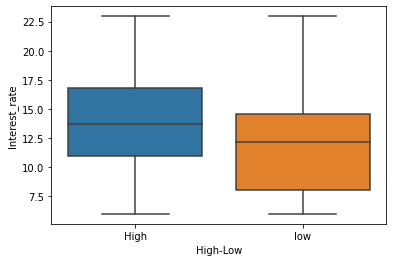

In [20]:
sns.boxplot(x='High-Low', y='Interest_rate', data=loans_new)
plt.show()

In [21]:
# perform the test
t,pval=stats.ttest_ind(ir_high_loan_amount, ir_low_loan_amount)
print("t-statistic: ", t.round(3))
print("p-value: ", pval.round(3))

t-statistic:  11.667
p-value:  0.0


In [60]:
loans_new.columns

Index(['Loan_len', 'Loan_purpose', 'debt_to_income', 'State', 'Home_ownership',
       'FICO_range', 'Employment_len', 'Amt_req', 'Amt_funded',
       'Interest_rate', 'Monthly_income', 'Open_creditlines',
       'Revolving_credit_balance', 'Inq_last6_month', 'High-Low'],
      dtype='object')

b. Loan length is directly effecting interest rate.

In [22]:
loans_new['Loan_len'] = pd.to_numeric(loans_new['Loan_len'].str.replace('months', ''))

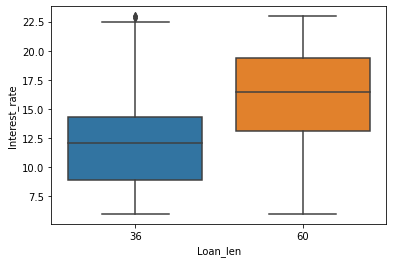

In [23]:
sns.boxplot(x='Loan_len', y='Interest_rate', data=loans_new)
plt.show()

In [24]:
loans_new.loc[:,['Loan_len','Interest_rate']].corr()

,Loan_len,Interest_rate
Loan_len,1.000000,0.423153
Interest_rate,0.423153,1.000000


In [70]:
# perform the test 
corr, pval= stats.pearsonr( loans_new.Loan_len, loans_new.Interest_rate )
print('Correlation coefficient:', corr.round(3))
print('p-value:', pval.round(3))

Correlation coefficient: 0.423
p-value: 0.0


c. Interest rate varies for different purpose of loans

In [ ]:
We will perform ANOVA test.

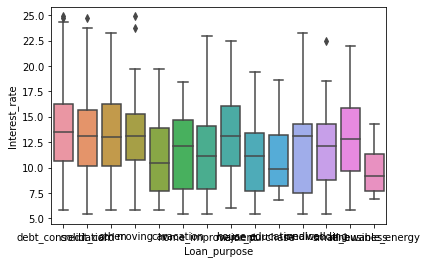

In [38]:
# Box plot
sns.boxplot(x='Loan_purpose', y='Interest_rate', data=loans_new)
plt.show()

In [40]:
# get the different unique of Loan_purpose
loans_new.Loan_purpose.nunique()

14

In [41]:
# get the freq of different Loan_purpose
loans_new.Loan_purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_purpose, dtype: int64

In [25]:
var = 'Interest_rate'
# filter the data based on loan purpose
s1 = loans_new.loc[loans_new.Loan_purpose == 'debt_consolidation', var ]
s2 = loans_new.loc[loans_new.Loan_purpose == 'credit_card', var ]
s3 = loans_new.loc[loans_new.Loan_purpose == 'other', var ]
s4 = loans_new.loc[loans_new.Loan_purpose == 'home_improvement', var ]
s5 = loans_new.loc[loans_new.Loan_purpose == 'major_purchase', var ]
s6 = loans_new.loc[loans_new.Loan_purpose == 'small_business', var ]
s7 = loans_new.loc[loans_new.Loan_purpose == 'car', var ]
s8 = loans_new.loc[loans_new.Loan_purpose == 'wedding', var ]
s9 = loans_new.loc[loans_new.Loan_purpose == 'moving', var ]
s10 = loans_new.loc[loans_new.Loan_purpose == 'vacation', var ]
s11 = loans_new.loc[loans_new.Loan_purpose == 'house', var ]
s12 = loans_new.loc[loans_new.Loan_purpose == 'educational', var ]
s13 = loans_new.loc[loans_new.Loan_purpose == 'renewable_energy', var ]
s14 = loans_new.loc[loans_new.Loan_purpose == 'medical', var ]

# display the means of the samples
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean(),
     'mean of s4: ', s4.mean(), '| mean of s5: ', s5.mean(), '| mean of s6: ', s6.mean(),
     'mean of s7: ', s7.mean(), '| mean of s8: ', s8.mean(), '| mean of s9: ', s9.mean(),
     'mean of s10: ', s10.mean(), '| mean of s11: ', s11.mean(), '| mean of s12: ', s12.mean(),
      'mean of s13: ', s13.mean(), '| mean of s14: ', s14.mean())

mean of s1:  13.576203749043632 | mean of s2:  13.047648746113989 | mean of s3:  13.157332338308455 mean of s4:  11.615381578947373 | mean of s5:  10.805326732673265 | mean of s6:  12.841425287356316 mean of s7:  11.116880000000002 | mean of s8:  12.087547263451793 | mean of s9:  13.533579310344832 mean of s10:  11.993047619047621 | mean of s11:  13.448000000000002 | mean of s12:  11.007333333333332 mean of s13:  9.8775 | mean of s14:  11.657796666666671


In [43]:
# perform the test
fval,pval=stats.f_oneway( s1, s2, s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14 )
print('f-stats:',fval.round(3))
print('p-value:', pval.round(3))

f-stats: 7.491
p-value: 0.0


d. There is relationship between FICO scores and Home Ownership. It means that, People
with owning home will have high FICO scores.

In [ ]:
we will perfom chi_squared test

In [72]:
obs_freq = pd.crosstab(loans_new['FICO_range'], loans_new['Home_ownership'] )
obs_freq

Home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO_range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,41,0,0,17,67
665-669,52,0,0,18,75
670-674,68,0,1,13,91
675-679,79,0,1,11,75
680-684,55,0,2,9,91


In [73]:
# Perform the chi-squared test
chi_sq,p,dof,expected = stats.chi2_contingency(obs_freq)

print('Chi-squared statistic: ', chi_sq.round(3))
print('p-value: ', p.round(3))

Chi-squared statistic:  473.565
p-value:  0.0


# BUSINESS PROBLEM - 2
We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [46]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [47]:
price_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [48]:
price_quotes.nunique()

Order_Number    12
Barry_Price     12
Mary_Price      11
dtype: int64

In [49]:
price_quotes.shape

(12, 3)

In [77]:
# two independent groups as samples
Barry = price_quotes.Barry_Price
Mary = price_quotes.Mary_Price

# display the mean price quotes of Barry and Mary
print('mean_price_quotes by Barry:', round(Barry.mean(),2))
print('mean_price_quotes by Mary:', round(Mary.mean(),2))

mean_price_quotes by Barry: 124.33
mean_price_quotes by Mary: 114.75


In [51]:
# perform the test
t,p=stats.ttest_ind( Barry, Mary )
print("t-statistic: ", t.round(3))
print("p-value: ", p.round(3))

t-statistic:  1.415
p-value:  0.171


# BUSINESS PROBLEM-3:
Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate
improved?

In [ ]:
we will perform relationship t test.

In [78]:
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [79]:
treatment_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [80]:
treatment_facility.rename( columns = {'VAR4':'TRFF(%)','VAR5':'CI(%)'}, inplace = True )

In [81]:
treatment_facility.nunique()

Month                20
Reengineer            2
Employee_Turnover    19
TRFF(%)              19
CI(%)                20
dtype: int64

In [82]:
treatment_facility['Month']=treatment_facility['Month'].astype('object')

In [83]:
# creating a copy of the data
treatment_facility_continuous = treatment_facility.select_dtypes('float64')
treatment_facility_categorical = treatment_facility.select_dtypes('object')

In [84]:
# Outlier treatment
treatment_facility_continuous = treatment_facility_continuous.apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

In [85]:
treatment_facility_continuous.apply(continuous_var_summary)

,Employee_Turnover,TRFF(%),CI(%)
dtype,float64,float64,float64
cardinality,19,19,20
n_tot,20,20,20
n,20,20,20
nmiss,0,0,0
perc_miss,0.0,0.0,0.0
sum,282.639319,330.657936,863.218529
mean,14.131966,16.532897,43.160926
std,8.763574,9.931311,41.271169
var,76.800227,98.630938,1703.309352


In [86]:
treatment_facility_categorical.describe().T

,count,unique,top,freq
Month,20,20,1,1
Reengineer,20,2,Prior,13


In [87]:
treatment_facility_new = pd.concat([treatment_facility_categorical, treatment_facility_continuous], axis = 1 )
treatment_facility_new

,Month,Reengineer,Employee_Turnover,TRFF(%),CI(%)
0,1,Prior,0.000000,24.390244,42.682927
1,2,Prior,6.060600,19.354839,25.806452
2,3,Prior,12.121200,35.087719,143.535995
3,4,Prior,3.333300,18.404908,110.429448
4,5,Prior,12.903200,17.964072,23.952096
5,6,Prior,9.677400,40.019608,47.058824
6,7,Prior,11.764700,13.422819,1.890547
7,8,Prior,11.428600,31.250000,25.000000
8,9,Prior,23.076900,17.241379,132.183908
9,10,Prior,15.000000,16.574586,16.574586


In [88]:
treatment_facility_new.shape

(20, 5)

In [89]:
# Separate the data into before and after reengineering periods
before = treatment_facility_new[treatment_facility_new.Reengineer == 'Prior']
after = treatment_facility_new[treatment_facility_new.Reengineer == 'Post']

# sample means, sample standard deviations, and sample sizes for each variable
et_before_mean = before['Employee_Turnover'].mean()
et_before_sd = before['Employee_Turnover'].std()
et_before_n = before['Employee_Turnover'].count()
et_after_mean = after['Employee_Turnover'].mean()
et_after_sd = after['Employee_Turnover'].std()
et_after_n = after['Employee_Turnover'].count()

trff_before_mean = before['TRFF(%)'].mean()
trff_before_sd = before['TRFF(%)'].std()
trff_before_n = before['TRFF(%)'].count()
trff_after_mean = after['TRFF(%)'].mean()
trff_after_sd = after['TRFF(%)'].std()
trff_after_n = after['TRFF(%)'].count()

ci_before_mean = before['CI(%)'].mean()
ci_before_sd = before['CI(%)'].std()
ci_before_n = before['CI(%)'].count()
ci_after_mean = after['CI(%)'].mean()
ci_after_sd = after['CI(%)'].std()
ci_after_n = after['CI(%)'].count()

In [90]:
# perform the test
t_et, p_et = stats.ttest_ind_from_stats(et_before_mean, et_before_sd, et_before_n,
                                        et_after_mean, et_after_sd, et_after_n)

t_trff, p_trff = stats.ttest_ind_from_stats(trff_before_mean, trff_before_sd, trff_before_n,
                                            trff_after_mean, trff_after_sd, trff_after_n)


t_ci, p_ci = stats.ttest_ind_from_stats(ci_before_mean, ci_before_sd, ci_before_n,
                                        ci_after_mean, ci_after_sd, ci_after_n)

print("Employee Turnover t-value: ", t_et)
print("Employee Turnover p-value: ", p_et)
print("TRFF t-value: ", t_trff)
print("TRFF p-value: ", p_trff)
print("CI t-value: ", t_ci)
print("CI p-value: ", p_ci)

Employee Turnover t-value:  -1.7553523988179633
Employee Turnover p-value:  0.09620295075273506
TRFF t-value:  2.8060886539166927
TRFF p-value:  0.011683254122937102
CI t-value:  1.6443996320437704
CI p-value:  0.11744478015851731


# BUSINESS PROBLEM 4:
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring.

In [91]:
priority_assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [92]:
priority_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [93]:
priority_assessment.nunique()

Days        121
Priority      3
dtype: int64

In [94]:
priority_assessment_continuous = priority_assessment.select_dtypes('float64')
priority_assessment_categorical = priority_assessment.select_dtypes('object')

In [95]:
# Outlier treatment
priority_assessment_continuous = priority_assessment_continuous.apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

In [96]:
priority_assessment_continuous.apply(continuous_var_summary)

,Days
dtype,float64
cardinality,115
n_tot,642
n,642
nmiss,0
perc_miss,0.0
sum,1766.247
mean,2.751164
std,5.236411
var,27.420002


In [97]:
priority_assessment_categorical.describe().T

,count,unique,top,freq
Priority,642,3,High,326


In [98]:
priority_assessment_new = pd.concat([priority_assessment_categorical,priority_assessment_continuous], axis = 1 )
priority_assessment_new

,Priority,Days
0,High,3.3
1,Medium,7.9
2,High,0.3
3,Medium,0.7
4,Medium,8.6
...,...,...
637,Low,2.5
638,High,0.3
639,Medium,0.3
640,Medium,1.3


In [99]:
priority_assessment_new.shape

(642, 2)

In [100]:
# get the num unique of age_groups
priority_assessment_new.Priority.nunique()

3

In [101]:
# get the freq of Priority group
priority_assessment_new.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [102]:
priority_assessment_new.groupby('Priority').Days.mean()

Priority
High      2.652776
Low       4.228358
Medium    2.482498
Name: Days, dtype: float64

In [103]:
# filtering the data based on each priority level grops
var='Days'
high = priority_assessment_new.loc[priority_assessment_new.Priority == 'High',var]
medium = priority_assessment_new.loc[priority_assessment_new.Priority == 'Medium',var]
low = priority_assessment_new.loc[priority_assessment_new.Priority == 'Low',var]

In [104]:
# perform the ANOVA test
f_stat, p_value = stats.f_oneway(high, medium, low)
print("f-statistic: ", f_stat.round(3))
print("p-value: ", p_value.round(3))

f-statistic:  3.071
p-value:  0.047


# BUSINESS PROBLEM-5
Use the survey results to address the following questions
A.What is the overall level of customer satisfaction?
B.What factors are linked to satisfaction?
C.What is the demographic profile of Film on the Rocks patrons?
D.In what media outlet(s) should the film series be advertised?

In [383]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [384]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [421]:
films.drop( columns = ['_rowstate_'], inplace = True )

In [422]:
films_0 = films[films.Gender.isin(['Female','Male'])]
films_0

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
5,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,5
6,Ferris Buellers Day Off,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
7,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,NaN,4
8,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,NaN,4
9,Ferris Buellers Day Off,Female,Single,2.0,3.0,2.0,2.0,3.0,1.0,4


In [423]:
films_1 = films[films.Gender.isin(['1','2'])]
films_1

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
32,Ferris Buellers Day Off,2,1,2.0,2.0,1.0,1.0,3.0,2.0,1
33,Ferris Buellers Day Off,2,2,2.0,2.0,2.0,2.0,2.0,1.0,5
34,Ferris Buellers Day Off,1,2,1.0,3.0,1.0,2.0,2.0,2.0,2
35,Ferris Buellers Day Off,2,2,2.0,2.0,1.0,1.0,1.0,3.0,5
36,Ferris Buellers Day Off,1,1,2.0,2.0,2.0,2.0,2.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...
325,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [424]:
films_0['Gender'] = films_0['Gender'].map({'Male':'1', 'Female':'2'})

C:\Users\hp\AppData\Local\Temp/ipykernel_15300/1934290460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_0['Gender'] = films_0['Gender'].map({'Male':'1', 'Female':'2'})


In [425]:
films_0['Marital_Status'] = films_0['Marital_Status'].map({'Married':'1', 'Single':'2'})

C:\Users\hp\AppData\Local\Temp/ipykernel_15300/4272839441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_0['Marital_Status'] = films_0['Marital_Status'].map({'Married':'1', 'Single':'2'})


In [428]:
films_0

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1
5,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,5
6,Ferris Buellers Day Off,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
7,Ferris Buellers Day Off,2,2,1.0,1.0,3.0,1.0,3.0,NaN,4
8,Ferris Buellers Day Off,2,2,1.0,1.0,3.0,1.0,3.0,NaN,4
9,Ferris Buellers Day Off,2,2,2.0,3.0,2.0,2.0,3.0,1.0,4


In [427]:
films_0.loc[:,'Marital_Status' ]

0       1
1       2
2       1
3       1
4       1
5       1
6       1
7       2
8       2
9       2
10      1
11      1
12      2
13      2
14      2
15    NaN
16      2
17      2
18    NaN
19      2
20      2
21      2
22      1
23      2
24      2
25      2
26      2
27      2
28      2
29      1
30      1
31      1
Name: Marital_Status, dtype: object

In [431]:
films_0.loc[ [15,18], 'Marital_Status' ] = '2'

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [432]:
films_3 = pd.concat([films_0,films_1], axis = 0 )
films_3

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
325,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [433]:
films_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           330 non-null    object 
 1   Gender          330 non-null    object 
 2   Marital_Status  328 non-null    object 
 3   Sinage          328 non-null    float64
 4   Parking         328 non-null    float64
 5   Clean           327 non-null    float64
 6   Overall         328 non-null    float64
 7   Age             328 non-null    float64
 8   Income          314 non-null    float64
 9   Hear_About      323 non-null    object 
dtypes: float64(6), object(4)
memory usage: 28.4+ KB


In [434]:
films_3.Hear_About.value_counts()

5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [435]:
films_3['Hear_About'] = films_3['Hear_About'].map({'1':'1','2':'2','3':'3','4':'4','5':'5','2,5':'2', '3,4':'3','4,5':'4','1,5':'1','5,4':'5','3,5':'3','2,4':'2'})

In [436]:
films_3.nunique()

Movie             3
Gender            2
Marital_Status    2
Sinage            5
Parking           5
Clean             5
Overall           5
Age               4
Income            3
Hear_About        5
dtype: int64

In [437]:
films_3 = films_3.select_dtypes(['float64','object']).apply(lambda x: x.astype('object'))

In [439]:
# Missing value treatment
films_new = films_3.apply(lambda x:x.fillna(x.mode()[0]))

In [440]:
films_new.shape

(330, 10)

In [441]:
films_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           330 non-null    object 
 1   Gender          330 non-null    object 
 2   Marital_Status  330 non-null    object 
 3   Sinage          330 non-null    float64
 4   Parking         330 non-null    float64
 5   Clean           330 non-null    float64
 6   Overall         330 non-null    float64
 7   Age             330 non-null    float64
 8   Income          330 non-null    float64
 9   Hear_About      330 non-null    object 
dtypes: float64(6), object(4)
memory usage: 28.4+ KB


In [442]:
films_new.select_dtypes(['float64','object']).apply(lambda x: x.astype('object')).describe().T

,count,unique,top,freq
Movie,330,3,Willy Wonka,161
Gender,330,2,2,213
Marital_Status,330,2,2,230
Sinage,330.0,5.0,2.0,158.0
Parking,330.0,5.0,2.0,155.0
Clean,330.0,5.0,2.0,155.0
Overall,330.0,5.0,2.0,162.0
Age,330.0,4.0,2.0,177.0
Income,330.0,3.0,1.0,158.0
Hear_About,330,5,5,234


A.What is the overall level of customer satisfaction?

In [443]:
overall= films_new['Overall'].mean()
print('Overall customer satisfaction score:', round(overall,2))

Overall customer satisfaction score: 1.62


B.What factors are linked to satisfaction?

In [444]:
# We will calculate the correlation between each satisfaction question and the overall satisfaction score
corr = films_new.loc[:,['Sinage', 'Parking', 'Clean', 'Overall']].corr()
corr 

,Sinage,Parking,Clean,Overall
Sinage,1.000000,0.469180,0.349144,0.382103
Parking,0.469180,1.000000,0.440771,0.514429
Clean,0.349144,0.440771,1.000000,0.350822
Overall,0.382103,0.514429,0.350822,1.000000


In [445]:
print(corr.loc['Overall'])

Sinage     0.382103
Parking    0.514429
Clean      0.350822
Overall    1.000000
Name: Overall, dtype: float64


C.What is the demographic profile of Film on the Rocks patrons?

In [446]:
# We will calculate the percentage for each demographic variable to get the idea about the demographic profile of patrons.
gender_pct=films_new.Gender.value_counts()/films_new.shape[0]*100
marital_status_pct=films_new.Marital_Status.value_counts()/films_new.shape[0]*100
age_pct=films_new.Age.value_counts()/films_new.shape[0]*100
income_pct=films_new.Income.value_counts()/films_new.shape[0]*100

print('Gender:\n', gender_pct)
print('\nMarital Status:\n',marital_status_pct)
print('\nAge:\n', age_pct)
print('\nIncome:\n', income_pct)

Gender:
 2    64.545455
1    35.454545
Name: Gender, dtype: float64

Marital Status:
 2    69.69697
1    30.30303
Name: Marital_Status, dtype: float64

Age:
 2.0    53.636364
3.0    35.454545
1.0     7.878788
4.0     3.030303
Name: Age, dtype: float64

Income:
 1.0    47.878788
3.0    27.272727
2.0    24.848485
Name: Income, dtype: float64


D.In what media outlet(s) should the film series be advertised?

In [447]:
# We will calculate the percentage of respondents who selected different media outlet
media_pct =films_new.Hear_About.value_counts()/films_new.shape[0]*100

print(media_pct)

5    70.909091
4    12.727273
1     6.969697
3     5.151515
2     4.242424
Name: Hear_About, dtype: float64
